File Read from gdrive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
# change working directory on the drive
%cd '/content/gdrive/My Drive/Data/'

# read train.txt file line by line
with open('train-perceptron.txt', "r") as train:
    FileasList = train.readlines()

# split the string and store it into another list classwise
train = []
train_x1 = []
train_y1 = []
train_x2 = []
train_y2 = []
for i in range(len(FileasList)):
  train.append(FileasList[i].split())
  if(train[i][2] == '1'):
    train_x1.append(float(train[i][0]))
    train_y1.append(float(train[i][1]))
  else:
    train_x2.append(float(train[i][0]))
    train_y2.append(float(train[i][1]))


Mounted at /content/gdrive
/content/gdrive/My Drive/Data


Plotting all sample points 

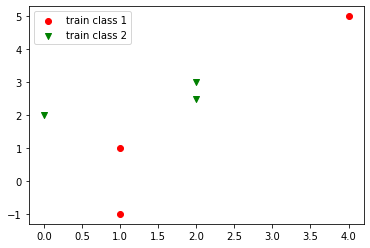

In [3]:
import matplotlib.pyplot as plt

plt.scatter(train_x1, train_y1, c = 'r', marker = 'o', label = 'train class 1')
plt.scatter(train_x2, train_y2, c = 'g', marker = 'v', label = 'train class 2')
plt.legend(loc = 'best')

Transform the 2D features to 6D using Phi Function & normalizing class 2

In [4]:
import numpy as np

data = np.empty((0,6), float)
for i in range(len(train)):
  x1 = float(train[i][0])
  x2 = float(train[i][1])
  cls = float(train[i][2])
  if(cls == 1):
    data = np.append(data, [[x1**2, x2**2, x1*x2, x1, x2, 1]], axis = 0)
  else:
    data = np.append(data, [[-x1**2, -x2**2, -x1*x2, -x1, -x2, -1]], axis = 0)

print(data)

[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]
 [16.   25.   20.    4.    5.    1.  ]]


Batch Update

In [5]:
def batchUpdate(iteration, weights, learningRate):
  w = np.array(weights,dtype = float)
  for i in range(iteration):
    temp = np.full_like(w, 0)
    for features in data:
      g1 =  np.dot(w, features)
      # if missclassified
      if(g1 <= 0):
        temp = temp + features
    # Update weights
    w = w + learningRate*temp
    
    # all weights are classified break loop
    if(np.count_nonzero(temp) == 0):
      break
  return (w,i+1)



Single Update

In [6]:
def singleUpdate(iteration, weights, learningRate):
  w = np.array(weights,dtype = float)
  for i in range(iteration):
    count = 0
    for features in data:
      g1 =  np.dot(w, features)
      # if missclassified
      if(g1 <= 0):
        # Update Weights
        count = count + 1
        w = w + learningRate*features
    # all weights are classified break loop
    if(count == 0):
      break
  return (w,i+1)

In [12]:
iterations = 200
weights = [1,1,1,1,1,1]
learningRate = .1
w, i = singleUpdate(iterations, weights, learningRate)
#w, i = batchUpdate(iterations, weights, learningRate)
print(w,i)


[ 1.    -1.025  0.7    0.2   -0.75   0.1  ] 6


**Initial Weight Vector All One**

,One at a time,Many at a time
0.1,6,102
0.2,147,104
0.3,149,91
0.4,149,116
0.5,141,105
0.6,157,114
0.7,136,91
0.8,136,91
0.9,140,105
1.0,141,93


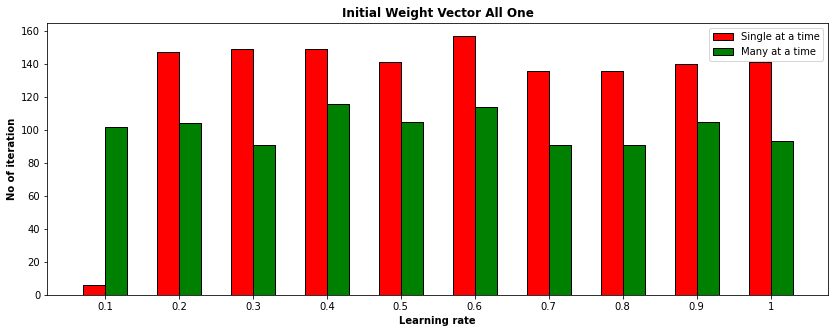

In [17]:
iterations = 200
learningRate = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
weights = [1,1,1,1,1,1]

# batch update weights all one
b_w1_itr = []
b_w1_w = []

for lr in learningRate:
  w,i = batchUpdate(iterations, weights, lr)
  b_w1_itr.append(i)
  b_w1_w.append(w)

# single update weights all one
s_w1_itr = []
s_w1_w = []

for lr in learningRate:
  w,i = singleUpdate(iterations, weights, lr)
  s_w1_itr.append(i)
  s_w1_w.append(w)

   
# Plotting Data

x = np.arange(len(learningRate))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize =(14, 5))
ax.bar(x - width/2, s_w1_itr, width, label='Single at a time',color ='r', edgecolor ='black')
ax.bar(x + width/2, b_w1_itr, width, label='Many at a time',color ='g', edgecolor ='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Learning rate', fontweight ='bold')
ax.set_ylabel('No of iteration', fontweight ='bold')
ax.set_title('Initial Weight Vector All One', fontweight ='bold')
ax.set_xticks(x)
ax.set_xticklabels(learningRate)
ax.legend()


# Table
import pandas as pd
df = pd.DataFrame(index=learningRate)
df = pd.concat([df, pd.DataFrame(s_w1_itr, index=learningRate, columns=['One at a time'])], axis=1)
df = pd.concat([df, pd.DataFrame(b_w1_itr, index=learningRate, columns=['Many at a time'])], axis=1)

def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

df.style.apply(highlight_min, subset=['One at a time','Many at a time'])
#print(df.loc[.1]['One at a time'])

**Initial Weight Vector All Zero**

,One at a time,Many at a time
0.1,141,105
0.2,141,105
0.3,141,105
0.4,141,105
0.5,141,92
0.6,141,105
0.7,141,92
0.8,141,105
0.9,141,105
1.0,141,92


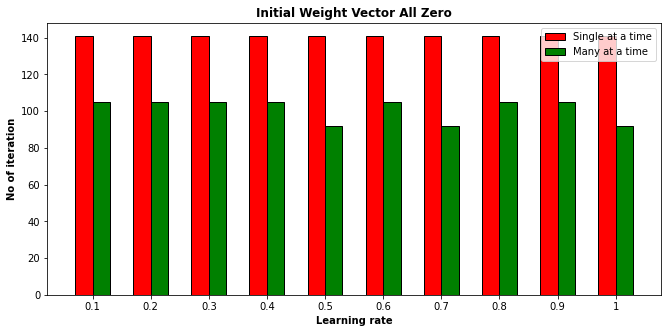

In [19]:
iterations = 200
learningRate = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
weights = [0,0,0,0,0,0]

# batch update weights all one
b_w1_itr = []
b_w1_w = []

for lr in learningRate:
  w,i = batchUpdate(iterations, weights, lr)
  b_w1_itr.append(i)
  b_w1_w.append(w)

# single update weights all one
s_w1_itr = []
s_w1_w = []

for lr in learningRate:
  w,i = singleUpdate(iterations, weights, lr)
  s_w1_itr.append(i)
  s_w1_w.append(w)

   
# Plotting Data
x = np.arange(len(learningRate))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize =(11, 5))
ax.bar(x - width/2, s_w1_itr, width, label='Single at a time',color ='r', edgecolor ='black')
ax.bar(x + width/2, b_w1_itr, width, label='Many at a time',color ='g', edgecolor ='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Learning rate', fontweight ='bold')
ax.set_ylabel('No of iteration', fontweight ='bold')
ax.set_title('Initial Weight Vector All Zero', fontweight ='bold')
ax.set_xticks(x)
ax.set_xticklabels(learningRate)
ax.legend()

# Table
df = pd.DataFrame(index=learningRate)
df = pd.concat([df, pd.DataFrame(s_w1_itr, index=learningRate, columns=['One at a time'])], axis=1)
df = pd.concat([df, pd.DataFrame(b_w1_itr, index=learningRate, columns=['Many at a time'])], axis=1)

df.style.apply(highlight_min, subset=['One at a time','Many at a time'])


**Initialized Weight Vector Randomly**

,One at a time,Many at a time
0.1,75,89
0.2,34,60
0.3,25,84
0.4,105,19
0.5,20,88
0.6,112,24
0.7,128,18
0.8,144,11
0.9,138,15
1.0,8,104


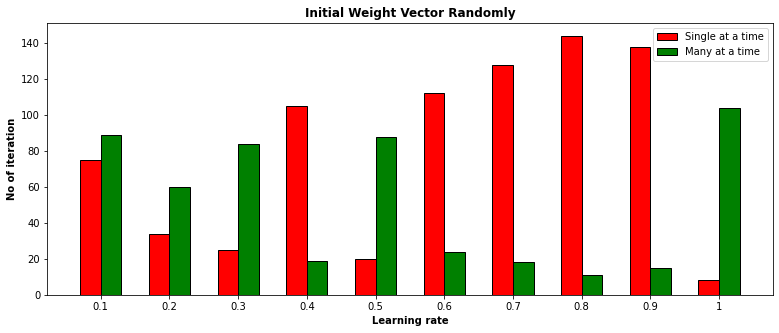

In [20]:
import random
iterations = 200
learningRate = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

random.seed(1)
weights = [random.randint(1,5),random.randint(6,10),random.randint(11,15),random.randint(16,20),random.randint(5,15),random.randint(10,20)]

# batch update weights all one
b_w1_itr = []
b_w1_w = []

for lr in learningRate:
  w,i = batchUpdate(iterations, weights, lr)
  b_w1_itr.append(i)
  b_w1_w.append(w)

# single update weights all one
s_w1_itr = []
s_w1_w = []

for lr in learningRate:
  w,i = singleUpdate(iterations, weights, lr)
  s_w1_itr.append(i)
  s_w1_w.append(w)

   
# Plotting Data
x = np.arange(len(learningRate))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize =(13, 5))
ax.bar(x - width/2, s_w1_itr, width, label='Single at a time',color ='r', edgecolor ='black')
ax.bar(x + width/2, b_w1_itr, width, label='Many at a time',color ='g', edgecolor ='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Learning rate', fontweight ='bold')
ax.set_ylabel('No of iteration', fontweight ='bold')
ax.set_title('Initial Weight Vector Randomly', fontweight ='bold')
ax.set_xticks(x)
ax.set_xticklabels(learningRate)
ax.legend()

# Table
df = pd.DataFrame(index=learningRate)
df = pd.concat([df, pd.DataFrame(s_w1_itr, index=learningRate, columns=['One at a time'])], axis=1)
df = pd.concat([df, pd.DataFrame(b_w1_itr, index=learningRate, columns=['Many at a time'])], axis=1)

df.style.apply(highlight_min, subset=['One at a time','Many at a time'])